# 9.2 Plotting with pandas and seaborn（用pandas和seaborn绘图）

matplotlib是一个相对底层的工具。pandas自身有内建的可视化工具。另一个库seaborn则是用来做一些统计图形。

> 导入seaborn会改变matlotlib默认的颜色和绘图样式，提高可读性和美感。即使不适用seaborn的API，也可以利用seaborn来提高可视化的效果。

# 1 Line Plots（线图）

Series和DataFrame各自都有plot属性，用来做一些比较基本的绘图类型。默认，plot()会绘制线图：

In [1]:
%matplotlib inline
# 如果不添加这句，是无法直接在jupyter里看到图的

In [2]:
import numpy as np
import pandas as pd

In [3]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))

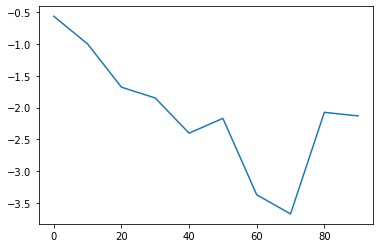

In [4]:
s.plot()

Series对象的index（索引），被matplotlib用来当做x轴，当然，我们也可以自己设定不这么做，use_index=False。x轴的ticks（标记）和limits（范围）能通过xticks和xlim选项来设定，而y轴的可以用yticks和ylim来设定。下面是关于plot的一些选项。

![](http://oydgk2hgw.bkt.clouddn.com/pydata-book/ebgnj.png)

大部分的pandas绘图方法接受一个ax参数，可以作为一个matplotlib subplot对象。这给我们更强的灵活性在gird layout（网格样式）中放置subplot。

DataFrame的plot方法，会把每一列画出一条线，所有的线会画在同一个subplot（子图）上，而且可以添加legend（图例）：

In [6]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))

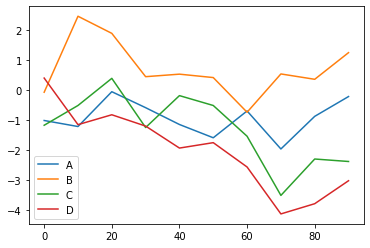

In [7]:
df.plot()

plot属性中，包含一组方法，来画出不同类型的绘图。例如，df.plot()等同于df.plot.line()。

> 一些额外的关键字可以在plot里设定，并会被matplotlib函数执行，所以我们可以学习matplotlib API来定制化想要的绘图。

DataFrame有一些选项在处理列的时候提供了灵活性；例如，是否把所有列都画在一个子图中，或者把不同列画在不同的子图中。下图有更多的设定：

![](http://oydgk2hgw.bkt.clouddn.com/pydata-book/tma2m.png)

# 2 Bar Plots（条形图）

plot.bar()和plot.barh()分别绘制垂直和水平的条形图。这种情况下，series或DataFrame的index会被用来作为x(bar)或y(barh)的ticks（标记）：

In [8]:
import matplotlib.pyplot as plt

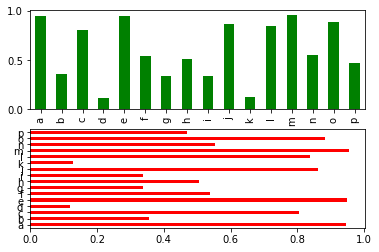

In [17]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0],color='g')
data.plot.barh(ax=axes[1],color='red')

color='k'设置颜色为黑，而alpha=0.7则设置局部透明度（靠近1越明显，靠近0则虚化）。

对于DataFrame，条形图绘图会把每一行作为一个组画出来：

In [18]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))

In [19]:
df

Genus,A,B,C,D
one,0.610656,0.310295,0.776699,0.633639
two,0.383682,0.715912,0.006379,0.018562
three,0.817938,0.215772,0.254813,0.425571
four,0.293554,0.778117,0.995782,0.854184
five,0.867315,0.122876,0.640840,0.911710
six,0.353103,0.974831,0.502223,0.943747


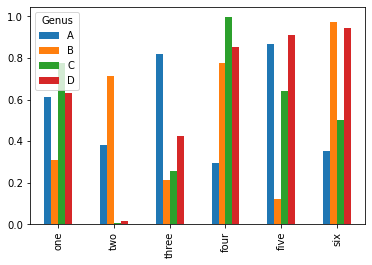

In [20]:
df.plot.bar()

In [21]:
import seaborn

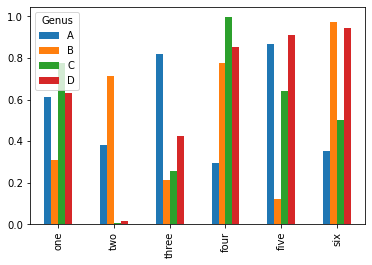

In [22]:
df.plot.bar() # 可以看到导入seaborn后画出来的图漂亮多了

注意这里DataFrame列名的"Genus"，被作为图例。

我们可以设定stacked=True，令条形图堆叠起来，能让每一行的所有值都被堆起来：

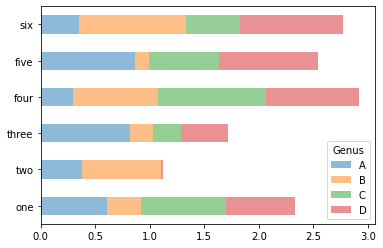

In [25]:
df.plot.barh(stacked=True, alpha=0.5)

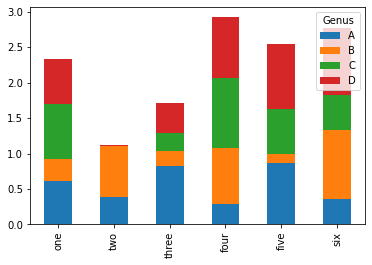

In [26]:
df.plot.bar(stacked=True)

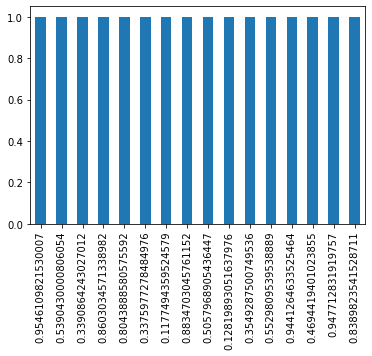

In [29]:
data.value_counts().plot.bar()

> 一个小窍门，在画series的值出现的频率的条形图时，可以使用value_counts: `s.value_counts().plot.bar()`

之前我们用到过tipping(小费)数据集，假设我们想做一个堆叠的条形图，来表示在每一天，每一个大小不同的组（party）中，数据点的百分比。用read_csv导入数据，并按天数（day）和组大小（party size）做一个交叉报表（cross-tabulation）：

In [30]:
tips = pd.read_csv('../examples/tips.csv')

In [34]:
tips

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [40]:
party_counts = pd.crosstab(tips['day'], tips['size'])


In [49]:
pd.crosstab(tips['day'],tips['size'],values=tips['size'], aggfunc=sum)

size,1,2,3,4,5,6
day,,,,,,
Fri,1.0,32.0,3.0,4.0,NaN,NaN
Sat,2.0,106.0,54.0,52.0,5.0,NaN
Sun,NaN,78.0,45.0,72.0,15.0,6.0
Thur,1.0,96.0,12.0,20.0,5.0,18.0


In [41]:
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [42]:
# 大于1人小于6人
party_counts = party_counts.loc[:, 2:6]
party_counts

size,2,3,4,5,6
day,,,,,
Fri,16,1,1,0,0
Sat,53,18,13,1,0
Sun,39,15,18,3,1
Thur,48,4,5,1,3


标准化一下，让每一行的和变为1，然后绘图：

In [54]:
party_counts.sum(1)

day
Fri     18
Sat     85
Sun     76
Thur    61
dtype: int64

In [55]:
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

size,2,3,4,5,6
day,,,,,
Fri,0.888889,0.055556,0.055556,0.000000,0.000000
Sat,0.623529,0.211765,0.152941,0.011765,0.000000
Sun,0.513158,0.197368,0.236842,0.039474,0.013158
Thur,0.786885,0.065574,0.081967,0.016393,0.049180


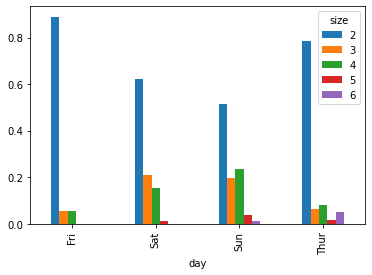

In [56]:
party_pcts.plot.bar()

这样我们可以看出来，在周末的时候组大小（party size）是增大的。

对于需要汇总的数据，使用seaborn能方便很多。让我们试一下用seaborn，按day来查看tipping percentage(小费百分比)：

In [57]:
import seaborn as sns

In [58]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

In [59]:
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


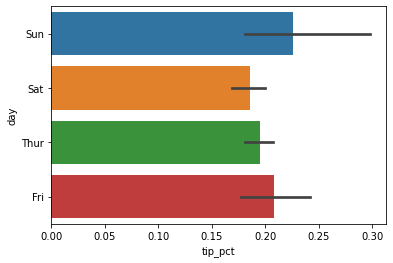

In [65]:
sns.barplot(x='tip_pct',y='day',data=tips)

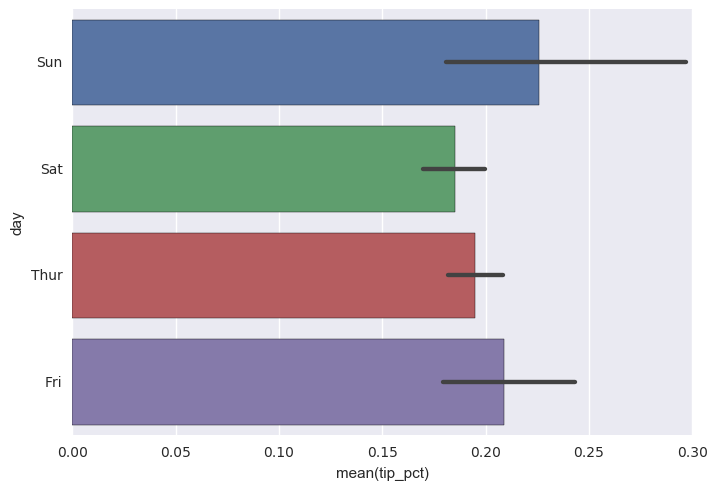

In [41]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

seaborn的绘图函数中有一个data参数，这里可以导入pandas的DataFrame。其他参数指的是列名。因为每一天（比如一个固定的周六）可能会有多个不同的值，所以条形图表示的是tip_pct的平均值。条形图上的黑线表示95%的置信区间（confidence interval）（这个可以通过可选参数进行更改）。

seaborn.barplot有一个hue选项，这个能让我们通过一个额外的类别值把数据分开：

In [66]:
sns.set_style("ticks") # 我们可以换一个样式
# sns.set_style("white")

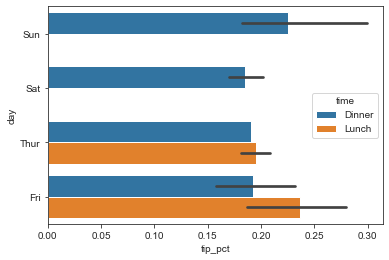

In [67]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

注意seaborn会自动更改绘图的外观：默认的调色板，绘图背景，网格颜色。我们可以自己设定不同的绘图外观，通过seaborn.set:

In [68]:
sns.set(style='whitegrid')

# 3 Histograms and Density Plots（柱状图和密度图）

柱状图是一种条形图，不过值的频率是分割式的。数据点被分割为，离散的甚至是隔开的bin（BIN是储存箱、存放箱、垃圾箱的意思，中文实在是不好翻译，我把它理解为一个小柱子，之后就直接用bin了），而且每个bin中的数据点的数量会被画出来。用上面的tipping数据集，我们可以用plot.hist做一个柱状图来表示小费（tip）占总费用（total bill）的比例：

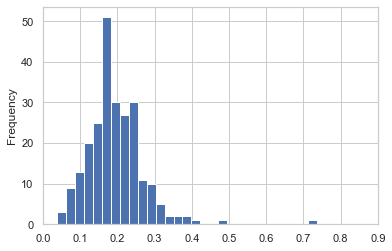

In [80]:
fig, axes = plt.subplots(1,1)

tips['tip_pct'].plot.hist(ax=axes,bins=100, xlim=[0,0.9])
# axes.set_xlim([0,0.8])

另一种相关的绘图类型是density plot（密度图），这个是用来计算观测数据中，连续概率分布的推测值。通常的步骤是用一组混合的“kernels”（核）来近似这个分布————核指的是，像正态分布一样的简单分布。因此，概率图也经常被叫做kernel density estimate(KDE, 核密度估计)图。用plot.kde，通过conventional mixture-of-normals estimate（常规混合估计
）制作一个密度图：

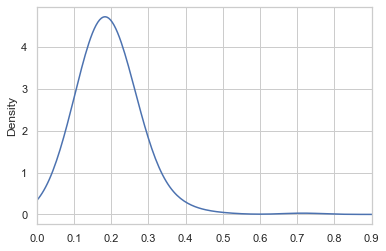

In [82]:
tips['tip_pct'].plot.density(xlim=[0,0.9])

seaborn能更方便地绘制柱状图和概率图，通过distplot方法，这个方法可以同时绘制一个柱状图和a continuous density estimate（一个连续密度估计）。举个例子，考虑一个bimodal distribution（双峰分布，二项分布），它由连个不同的标准正态分布组成：

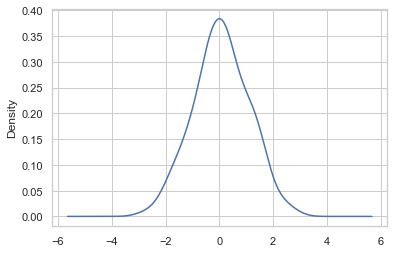

In [98]:
comp1 = np.random.normal(0, 1, size=200)
pd.Series(comp1).plot.density()
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))

In [87]:
values[:10]

0    0.066755
1   -0.630744
2   -0.335677
3    0.104351
4   -1.470934
5    1.108818
6    0.758477
7   -0.875147
8    0.421835
9   -0.255034
dtype: float64

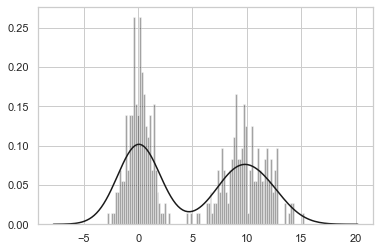

In [101]:
sns.distplot(values, bins=100, color='k')

（我在运行上面的代码时，报错提示为ypeError: slice indices must be integers or None or have an __index__ method。通过更新statsmodels这个包解决了问题，原先的版本是0.6，更新到0.8后就没问题了。可以直接输入`conda install -c statsmodels statsmodels=0.8.0
`）

# 4 Scatter or Point Plots（散点图或点图）
散点图对于检查二维数据之间的关系是非常有用的。例如，我们导入macrodata数据集，选一些参数，然后计算log differences（对数差分）：

In [102]:
macro = pd.read_csv('../examples/macrodata.csv')
macro.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [106]:
data = macro.loc[:,['cpi', 'm1', 'tbilrate', 'unemp']]
data.head()

,cpi,m1,tbilrate,unemp
0,28.98,139.7,2.82,5.8
1,29.15,141.7,3.08,5.1
2,29.35,140.5,3.82,5.3
3,29.37,140.0,4.33,5.6
4,29.54,139.6,3.50,5.2


In [120]:
np.log(data).diff()
# trans_data[-5:]

,cpi,m1,tbilrate,unemp
0,NaN,NaN,NaN,NaN
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
...,...,...,...,...
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339


关于对数差分译者找到的一些资料：

1 
1. 取对数(log)：缩小差距，减少异方差性
2. 差分：非平缓数据变平稳的技能

2 是原始序列的对数增长率，而且这么处理后序列会更平稳

3 
对于不平稳的时间序列，我们可以通过差分的方法使它平稳，但是差分之后的问题是有的经济意义就无法直观解释了，所以我们又有了构建协整关系这一方法。


然后我们可以利用seaborn的regplot方法，它可以产生一个散点图并拟合一条回归线：

In [121]:
sns.set_style("whitegrid")

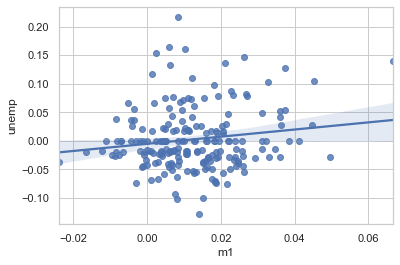

In [122]:
sns.regplot('m1', 'unemp', data=trans_data)

在数据探索阶段，散点图能把一组变量之间所有的散点图都画出来，这种图被称之为pairs plot（多变量图）或scatter plot matrix（散点图矩阵）。画这样的图很麻烦，所以seaborn有一个非常方便的pairplot函数，这个函数可以把每一个参数的柱状图或密度估计画在对角线上：

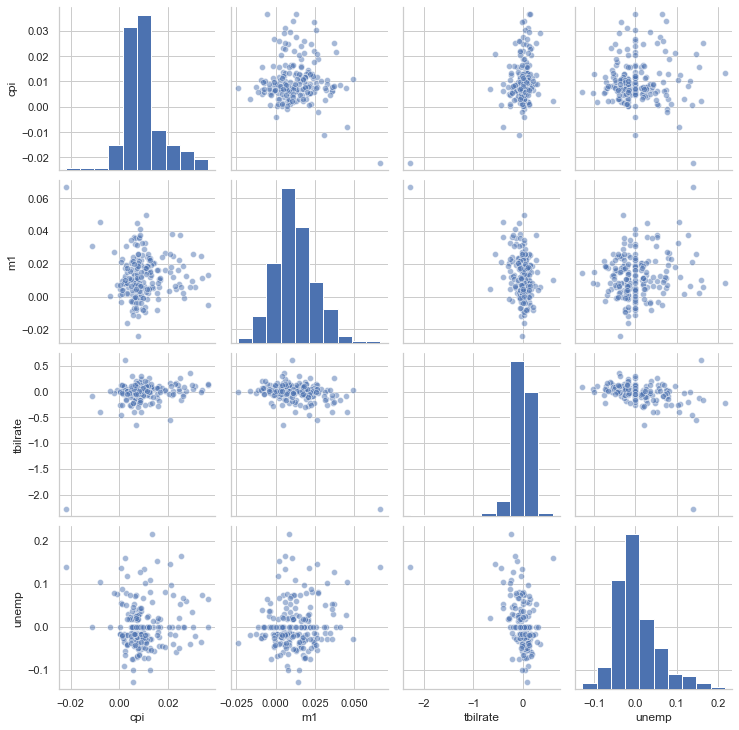

In [126]:
sns.pairplot(trans_data,plot_kws={'alpha': 0.5})

这里要注意一下plot_kws关键字。这个让我们能导入设置选项，用来控制非对角线上的绘图。查看seaborn.pairplot的字符串文档查看更多的设定选项。

In [125]:
sns.pairplot?

Signature:
sns.pairplot(
    data,
    hue=None,
    hue_order=None,
    palette=None,
    vars=None,
    x_vars=None,
    y_vars=None,
    kind='scatter',
    diag_kind='auto',
    markers=None,
    height=2.5,
    aspect=1,
    corner=False,
    dropna=True,
    plot_kws=None,
    diag_kws=None,
    grid_kws=None,
    size=None,
)
Docstring:
Plot pairwise relationships in a dataset.

By default, this function will create a grid of Axes such that each numeric
variable in ``data`` will by shared in the y-axis across a single row and
in the x-axis across a single column. The diagonal Axes are treated
differently, drawing a plot to show the univariate distribution of the data
for the variable in that column.

It is also possible to show a subset of variables or plot different
variables on the rows and columns.

This is a high-level interface for :class:`PairGrid` that is intended to
make it easy to draw a few common styles. You should use :class:`PairGrid`
directly if you need more flexi

# 5 Facet Grids and Categorical Data（多面网格和类别数据）

如果遇到一些数据集，需要额外分组的维度，该怎么办？一个方法是使用类别变量来把数据可视化，利用facet grid（多面网格）。seaborn有一个有用的内建函数factorplot，能简化制作各种多面图的过程：

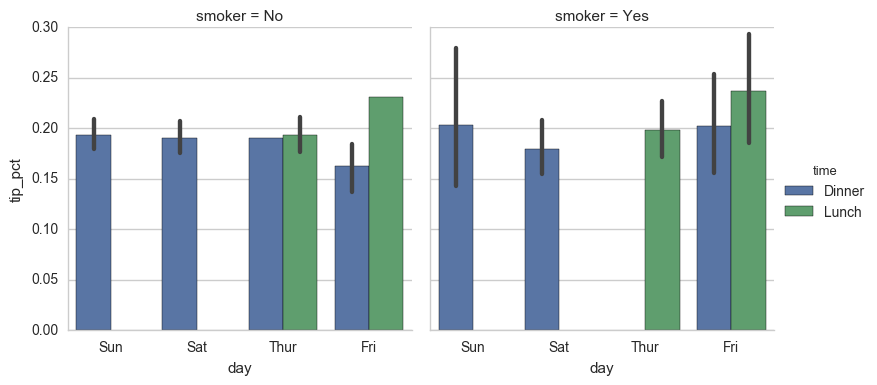

In [25]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker', 
               kind='bar', data=tips[tips.tip_pct < 1])

在一个facet（面）内，不是通过time和不同的柱状颜色来分组，我们也能通过添加给每一个time值添加一行的方式来扩展多面网格：

In [131]:
tips[tips.tip_pct < 1].head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


In [133]:
sns.factorplot(x='day', y='tip_pct', row='time',
               col='smoker', kind='bar', data=tips[tips.tip_pct])

KeyError: "None of [Float64Index([0.06320400500625782,  0.1912442396313364, 0.19988577955454023,\n              0.16249386352479137, 0.17206863679694948, 0.22886297376093295,\n              0.29542097488921715, 0.13131313131313133, 0.14984709480122327,\n              0.27965367965367965,\n              ...\n              0.23942537909018358,  0.1417233560090703, 0.08620689655172414,\n              0.03695514845230575, 0.14987163029525033,  0.2561661618347036,\n              0.07942811755361398, 0.09675858732462506,  0.1088985687616677,\n              0.19011406844106463],\n             dtype='float64', length=244)] are in the [columns]"

factorplot支持其他一些绘图类型，是否有用取决于我们想要如何展示。例如，box plots（箱线图，可以展示中位数，分位数和利群店）可能是一种有效的视觉类型：

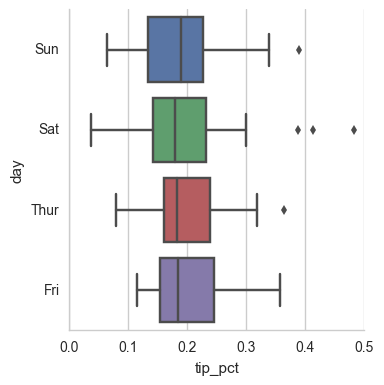

In [33]:
sns.factorplot(x='tip_pct', y='day', kind='box',
               data=tips[tips.tip_pct < 0.5])

通过seaborn.FacetGrid，我们可以创建自己的多面网格图。更多信息请查看seaborn的文档。